In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")


In [2]:
airlines=pd.read_excel("Airlines+Data.xlsx")

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Plotting the data 

<Axes: >

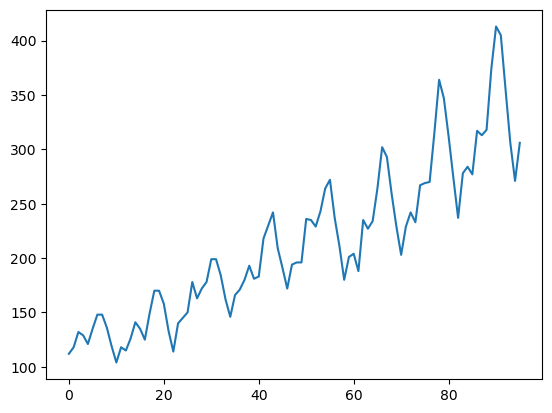

In [4]:
airlines.Passengers.plot()

In [5]:
len(airlines)

96

## Splitting train and test data

In [6]:
train=airlines.head(80)
test=airlines.tail(16)

In [7]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364


In [8]:
test

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374


## Plotting moving averages

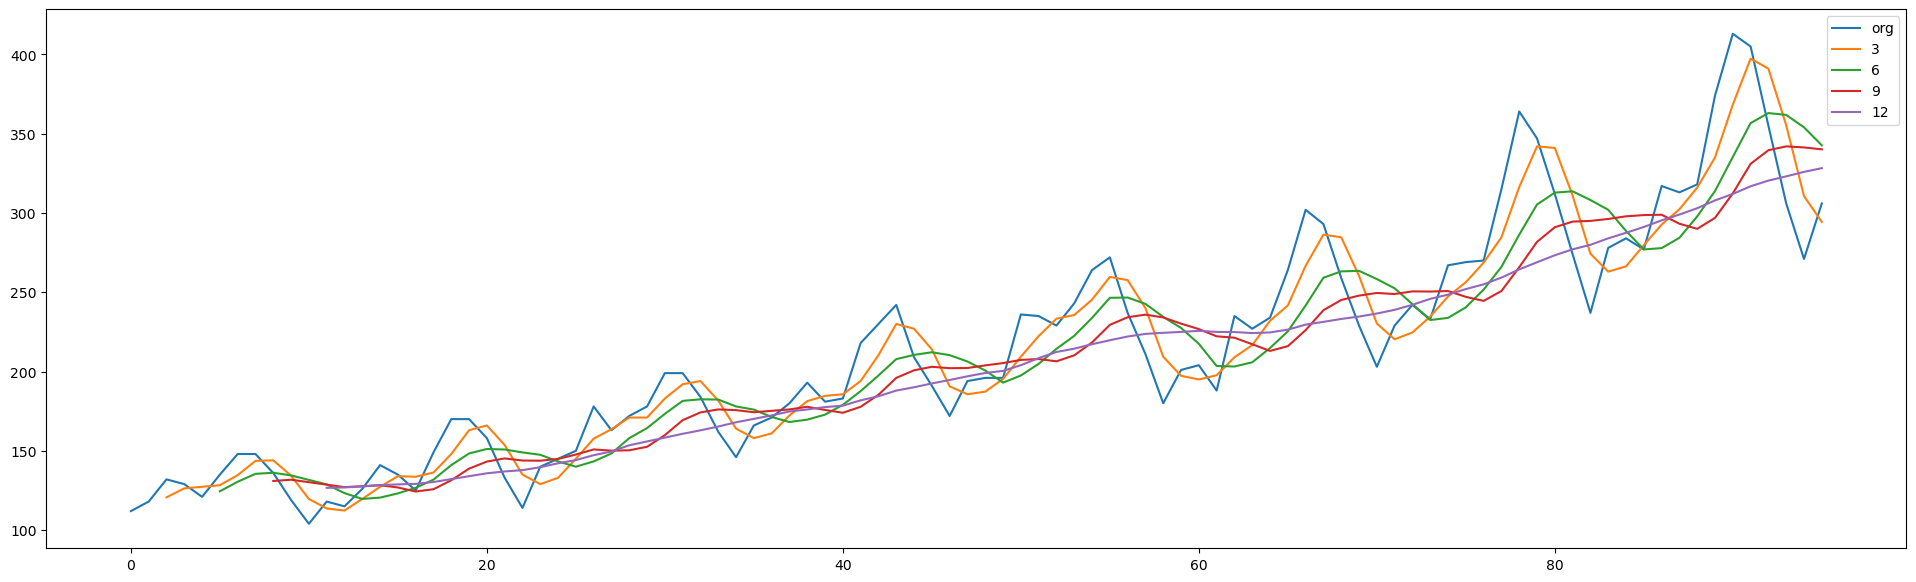

In [9]:
a=range(3,15,3)
plt.figure(figsize=(24,7))
airlines.Passengers.plot(label="org")
for i in a:
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

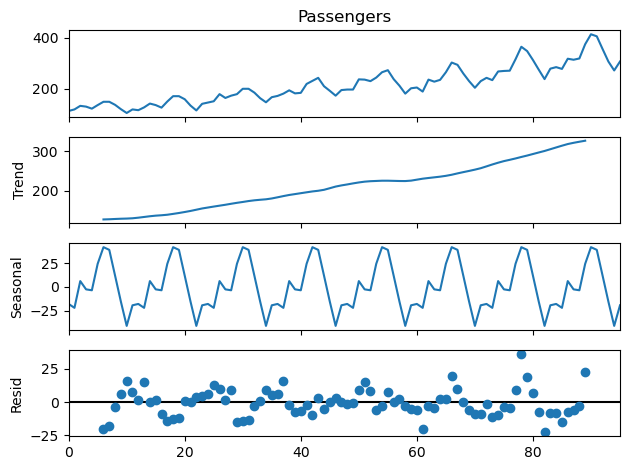

In [10]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

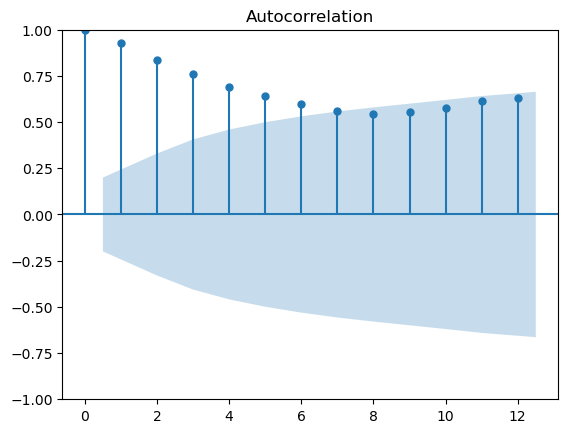

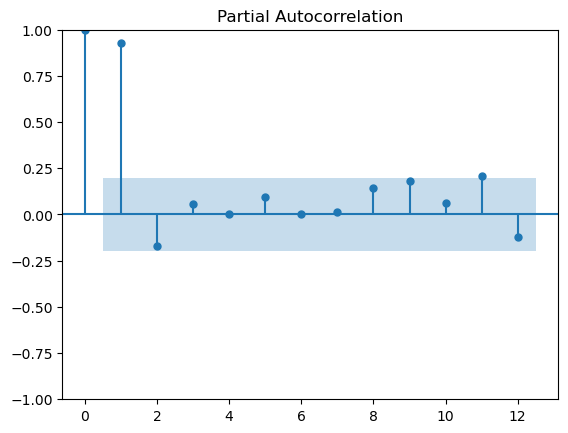

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [13]:
weights = np.array([0.1, 0.2, 0.3, 0.4])

In [14]:
df=pd.DataFrame()
df['Passengers']=airlines.Passengers
df['WMA'] = df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Passengers,WMA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7


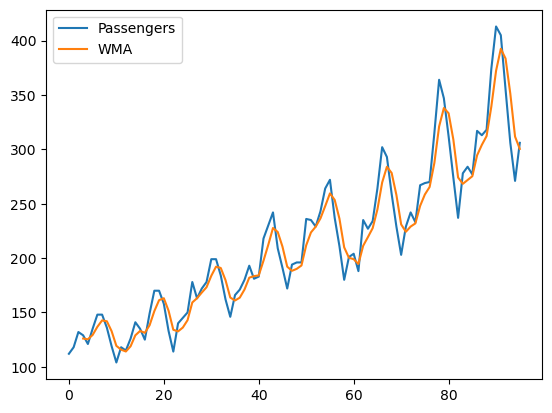

In [15]:

df.Passengers.plot(kind='line')
df.WMA.plot(kind='line')
plt.legend()

In [16]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

11.375850565189536

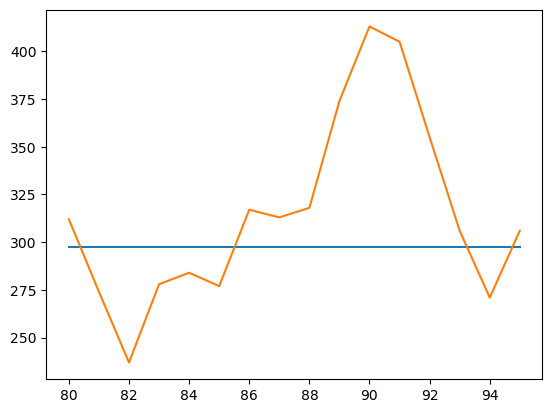

In [17]:
plt.plot(pred_ses)
plt.plot(test.Passengers)

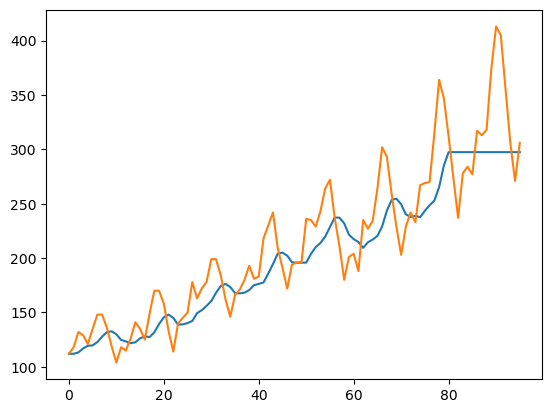

In [18]:
plt.plot(ses_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [19]:
acc_ses={}
for i in range(101):
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i/100)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    acc_ses[MAPE(pred_ses,test.Passengers)]=i

print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))

24:11.016377148241798


In [20]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

11.016377148241798

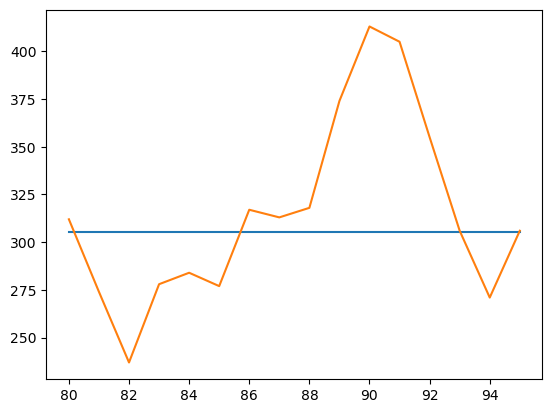

In [21]:
plt.plot(pred_ses)
plt.plot(test.Passengers)

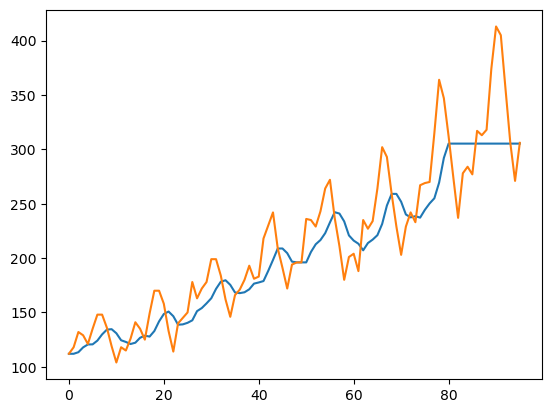

In [22]:
plt.plot(ses_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [23]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

59.93336692260693

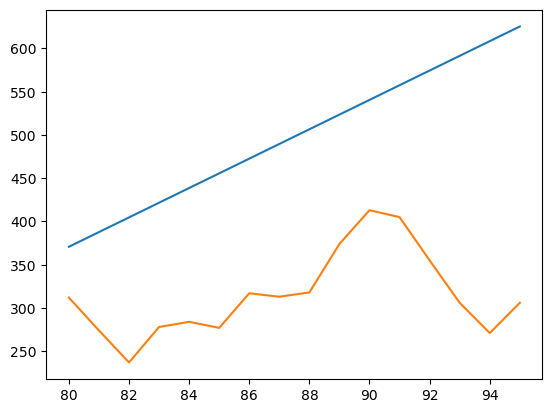

In [24]:
plt.plot(pred_holt)
plt.plot(test.Passengers)

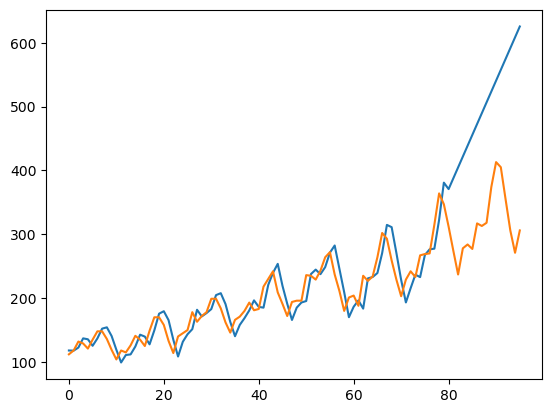

In [25]:
plt.plot(holt_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [26]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model = Holt(train["Passengers"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
        pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
        accuracy[MAPE(pred_holt,test.Passengers)]=(i,j)

In [27]:
accuracy[min(accuracy.keys())]

(5, 8)

In [28]:
min(accuracy.keys())

10.19838959844862

In [29]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.02, smoothing_slope=0.63)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

11.136872305578084

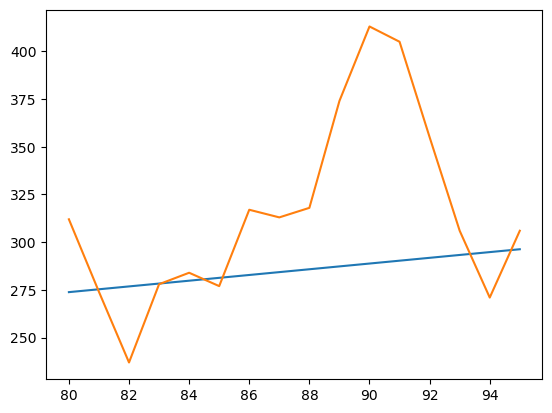

In [30]:
plt.plot(pred_holt)
plt.plot(test.Passengers)

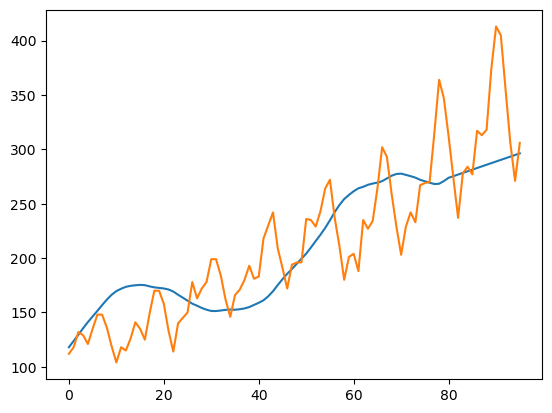

In [31]:
plt.plot(holt_model.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [32]:
hw_add_add = ExponentialSmoothing(train["Passengers"],seasonal='add', trend='add',seasonal_periods=12).fit()
pred_hw_add = hw_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw_add,test.Passengers)

7.945903658455101

## Plotting the predictions on the test data

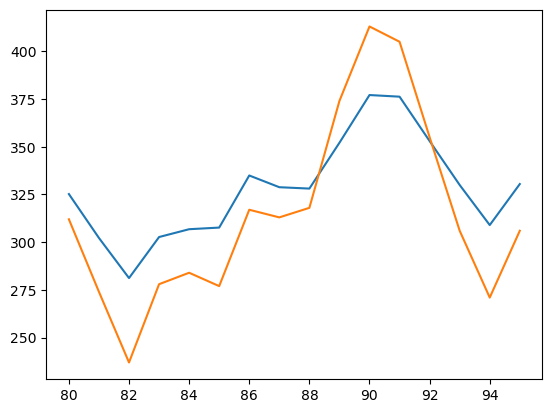

In [33]:
plt.plot(pred_hw_add)
plt.plot(test.Passengers)

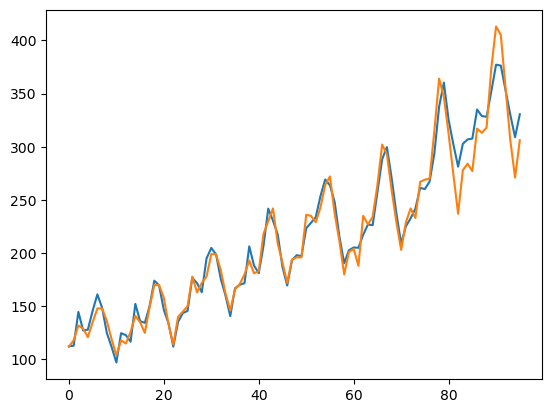

In [34]:
plt.plot(hw_add_add.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [35]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw = ExponentialSmoothing(train["Passengers"],seasonal=i, trend=j,seasonal_periods=12).fit()
        pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
        acc_hw[MAPE(pred_hw,test.Passengers)]=(i,j)

In [36]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [37]:
min(acc_hw.keys())

1.8507004199769592

In [38]:
hw = ExponentialSmoothing(train["Passengers"],seasonal='mul', trend='mul',seasonal_periods=12).fit()
pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

1.8507004199769592

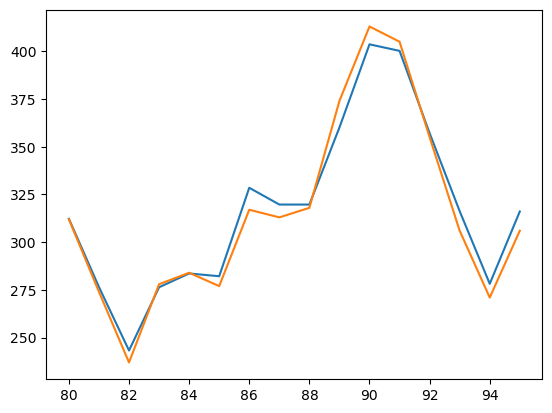

In [39]:
plt.plot(pred_hw)
plt.plot(test.Passengers)

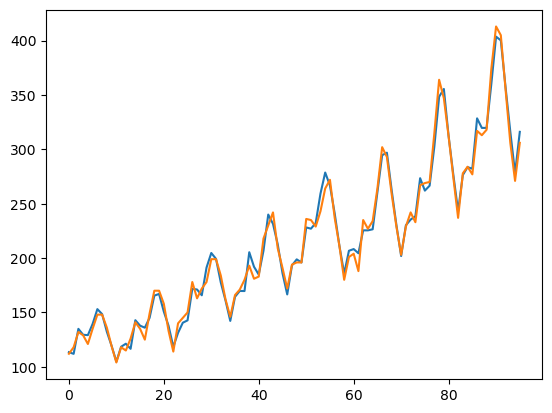

In [40]:
plt.plot(hw.predict(start=airlines.index[0],end=airlines.index[-1]))
plt.plot(airlines.Passengers)

In [41]:
model_final=hw

In [43]:
model_final